# Example: Wasserstein Metric and Signal

In [5]:
using PyPlot
using LinearAlgebra
# using Interpolations

In [6]:
Nt = 201;
dt = 1/100;
t = range(0, length=Nt, step=dt);

In [7]:
function gauss_func(t, b, c)
    y = exp.(-(t.-b).^2 ./ (2*c^2));
    return y./maximum(y)
end

function sin_func(t, omega, phi)
    return sin.(2*pi*omega*(t .- phi));
end

function ricker_func(t, t0, sigma)
    t = t.-t0;
    f = (1 .- t.^2 ./ sigma.^2) .* exp.(- t.^2 ./ (2 .* sigma.^2));
    return f
end

ricker_func (generic function with 1 method)

In [11]:
f = gauss_func(t, 1.1, 0.1);
g = gauss_func(t, 1, 0.1);
f = f ./ norm(f,1);
g = g ./ norm(g,1);

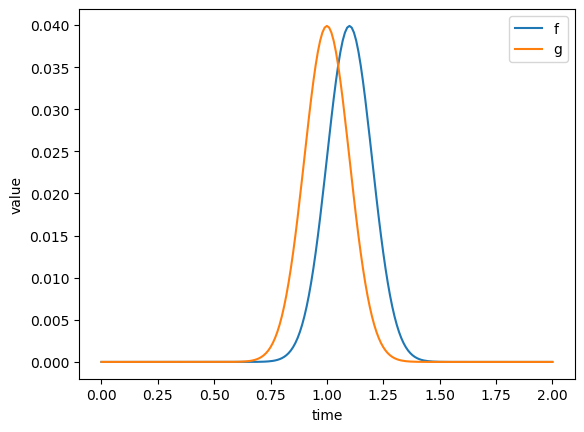

PyObject <matplotlib.legend.Legend object at 0x1430e91d0>

In [23]:
plot(t,f,t,g);
xlabel("time"); ylabel("value"); PyPlot.legend(("f", "g"))

In [24]:
function wasserstein_1d(f, g; p=2)
    F = zeros(Nt); G = zeros(Nt);
    G_inv_F = zeros(Nt);
    for i = 1:Nt
        F[i] = sum(f[1:i]);
        G[i] = sum(g[1:i]);
    end
    w = sum(abs.((F-G).^p)).^(1/p)
    return w
end

wasserstein_1d (generic function with 1 method)

## Gaussian
### Shift with respect to time

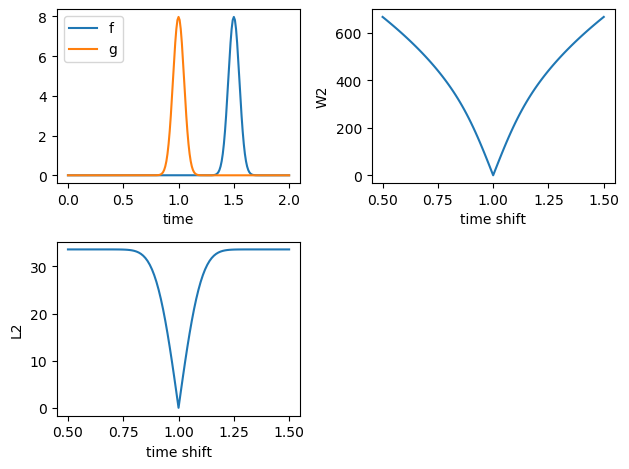

In [34]:
g = gauss_func(t, 1, 0.05);
g = g ./ (norm(g,1) * dt)
shift = 0.5:0.01:1.5;
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = gauss_func(t, shift[i], 0.05);
    f = f ./ (norm(f,1) * dt)
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("time shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("time shift"); ylabel("L2")
PyPlot.tight_layout()

### Shift with respect to shape

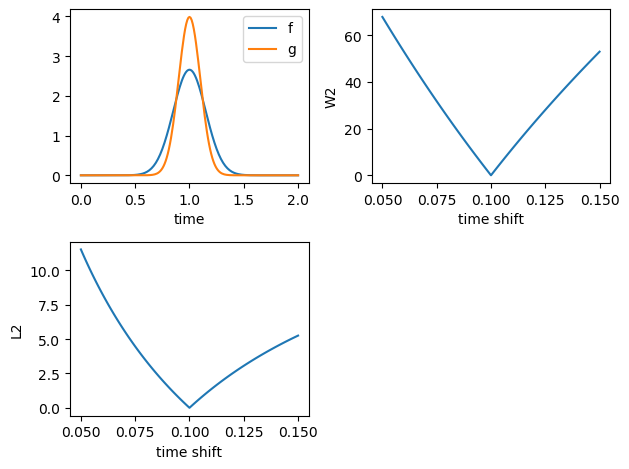

In [36]:
g = gauss_func(t, 1, 0.1);
g = g ./ (norm(g,1) * dt)
shift = 0.05:0.001:0.15
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = gauss_func(t, 1, shift[i]);
    f = f ./ (norm(f,1) * dt)
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

## Trigonometric
### Phase shift

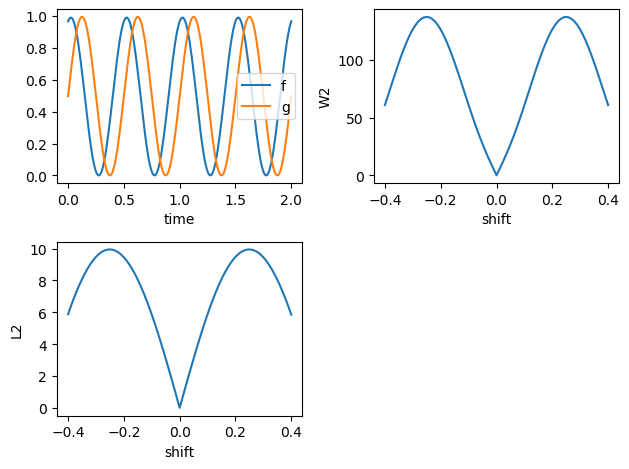

In [41]:
g = sin_func(t, 2, 0);
g = g .+ 1;
g = g ./ (norm(g,1)*dt)

shift = -0.4:0.01:0.4
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = sin_func(t, 2, shift[i]);
    f = f .+ 1;
    f = f ./ (norm(f,1)*dt)
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

## Frequency shift

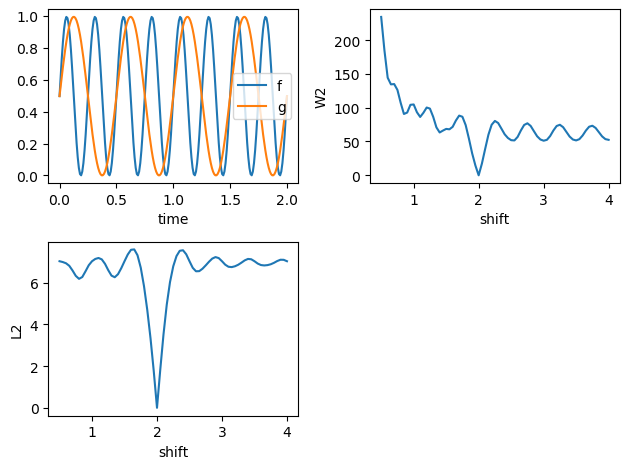

In [43]:
g = sin_func(t, 2, 0);
g = g .+ 1;
g = g ./ (norm(g,1)*dt)

shift = 0.5:0.05:4
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = sin_func(t, shift[i], 0);
    f = f .+ 1;
    f = f ./ (norm(f,1)*dt)
    
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

## Ricker
### Time shift, normlized with plus

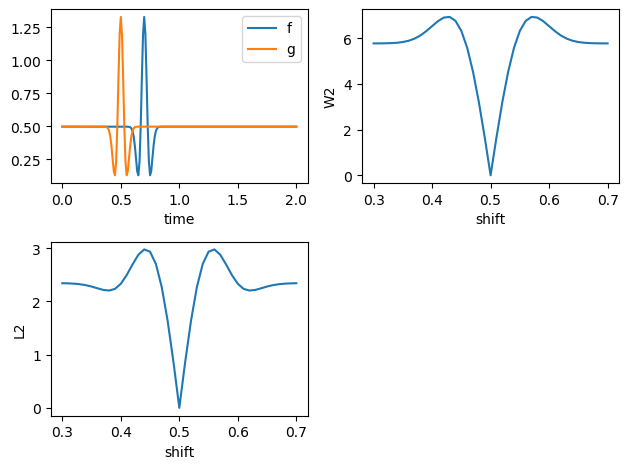

In [46]:
g = ricker_func(t, 0.5, 0.03);
g = g .+ 0.6;
g = g ./ (norm(g,1)*dt)

shift = 0.3:0.01:0.7
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = ricker_func(t, shift[i], 0.03);
    f = f .+ 0.6;
    f = f ./ (norm(f,1)*dt)
    
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

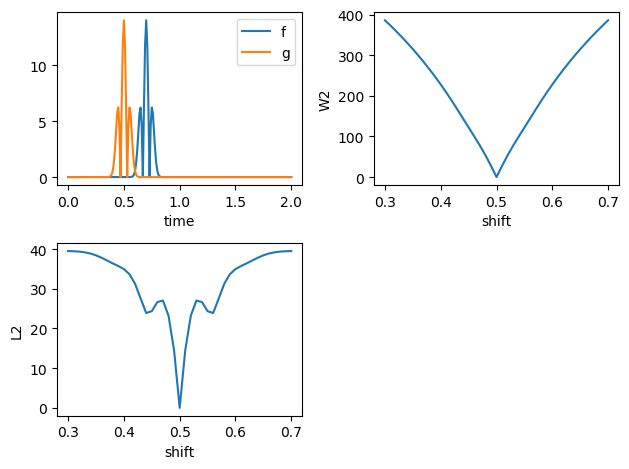

In [47]:
g = ricker_func(t, 0.5, 0.03);
g = abs.(g);
g = g ./(norm(g,1)*dt)

shift = 0.3:0.01:0.7
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = ricker_func(t, shift[i], 0.03);
    f = abs.(f);
    f = f ./ (norm(f,1)*dt)
    
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

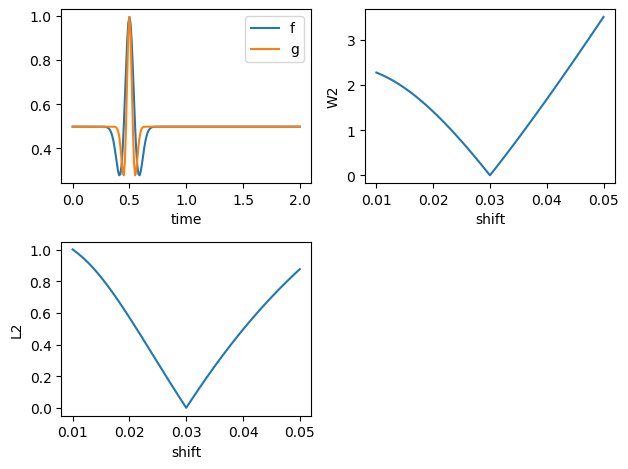

In [48]:
g = ricker_func(t, 0.5, 0.03);
g = g .+ 1;
g = g ./(norm(g,1)*dt)

shift = 0.01:0.001:0.05
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = ricker_func(t, 0.5, shift[i]);
    f = f .+ 1;
    f = f ./ (norm(f,1)*dt)
    
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

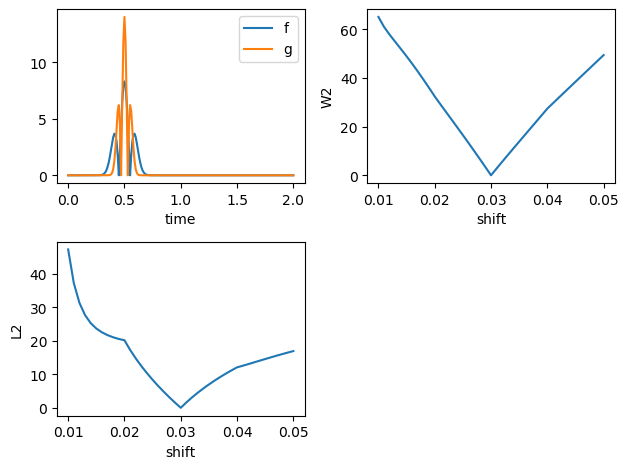

In [49]:
g = ricker_func(t, 0.5, 0.03);
g = abs.(g)
g = g ./(norm(g,1)*dt)

shift = 0.01:0.001:0.05
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = ricker_func(t, 0.5, shift[i]);
    f = abs.(f)
    f = f ./ (norm(f,1)*dt)
    
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

In [ ]:
g = ricker_func(t, 0.5, 0.03);
g = g .+ 1;
g = g ./(norm(g,1)*dt)

shift = 0.01:0.001:0.05
misfit = zeros(length(shift));
l2_misfit = zeros(length(shift));
for i = 1:length(shift)
    f = ricker_func(t, 0.5, shift[i]);
    f = f .+ 1;
    f = f ./ (norm(f,1)*dt)
    
    misfit[i] = wasserstein_1d(f, g; p=2)
    l2_misfit[i] = norm(f-g,2);
end

subplot(221)
plot(t, f, t, g); xlabel("time"); PyPlot.legend(("f", "g"))
subplot(222)
plot(shift, misfit); xlabel("shift"); ylabel("W2")
subplot(223)
plot(shift, l2_misfit); xlabel("shift"); ylabel("L2")
PyPlot.tight_layout()

# Example: W2 Metric and Transport Equation